In [1]:
import collections
import requests
import json
import re
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Test

In [2]:
with open('../../data/speeches_20.jsonl', 'r', encoding = 'utf8') as fp:
    data = list(fp)
speeches = []
for line in data:
    speeches.append(json.loads(line))

In [3]:
def groupSpeechesByParty(speeches):
    groupedSpeeches = {}
    for speech in speeches:
        tpo = speech['party']
        if tpo in groupedSpeeches:
            groupedSpeeches[tpo].append(speech)
        else:
            groupedSpeeches[tpo] = [speech]
    return groupedSpeeches

In [4]:
def clean_partyname(speeches):
    for speech in speeches:
        if 'BÜNDNIS\xa090/DIE GRÜNEN'.lower() in speech['party']:
            speech.update({'party': 'BÜNDNIS 90/DIE GRÜNEN'})
clean_partyname(speeches)

In [5]:
groupbyparty = groupSpeechesByParty(speeches)
print(f'alle Reden: {len(speeches)}') # Anzahl aller Reden
#for ele in groupbyparty:
#    print(len(groupbyparty[ele]))
# Überprüfung mit bspw.: len(groupbyparty['SPD'])

alle Reden: 4684


In [6]:
def extract_comments(speeches):
    regex = "{(.*?)}" # hier die genaue Definition der Kommentare vom Parser <<< >
    comments = []
    modified_speeches = []
    for speech in speeches:
        text = speech['text']
        matches = re.findall(regex,text)
        speech['comments'] = matches
        modified_speeches.append(speech)
    return modified_speeches
# Funktionsaufruf: speeches_comments = extract_comments(speeches)
speeches_comments = extract_comments(speeches)
# Funktionsausgabe: print(speeches_comments[0]['comments'])
#                   print(speeches_comments[0]['party'])

In [7]:
# filter: comments per party with contain words and not contain words
def filter_with_complex_non_words(search_terms , non_words , speeches_comments):
    filtered_speeches = []
    for speech in speeches:
        for comment in speech['comments']:
            if all([term in comment for term in search_terms]) and not any([term in comment for term in non_words]):
                filtered_speeches.append(speech)
    return filtered_speeches
# Funktionsaufruf:  specific_and_non_search = filter_with_complex_non_words(['Beifall','CDU'],['Zuruf'],speeches_comments)
# Funktionsausgabe: print(specific_and_non_search[0])                               enthält AND enthält nicht
#                   print(len(specific_and_non_search))
specific_and_non_search = filter_with_complex_non_words([],[],speeches)
print(f'Gesamtsumme aller Kommentare: {len(specific_and_non_search)}')

Gesamtsumme aller Kommentare: 37975


In [8]:
specific_and_non_search = filter_with_complex_non_words(['LINKE'],[],speeches_comments)
print(f'Anzahl Kommentare mit Beteiligung von Linke:        {len(specific_and_non_search)}')
specific_and_non_search = filter_with_complex_non_words(['SPD'],[],speeches_comments)
print(f'Anzahl Kommentare mit Beteiligung von SPD:          {len(specific_and_non_search)}')
specific_and_non_search = filter_with_complex_non_words(['DIE GRÜNEN'],[],speeches_comments)
print(f'Anzahl Kommentare mit Beteiligung von Grünen:       {len(specific_and_non_search)}')
specific_and_non_search = filter_with_complex_non_words(['CDU/CSU'],[],speeches_comments)
print(f'Anzahl Kommentare mit Beteiligung von CDU/CSU:      {len(specific_and_non_search)}')
specific_and_non_search = filter_with_complex_non_words(['FDP'],[],speeches_comments)
print(f'Anzahl Kommentare mit Beteiligung von FDP:          {len(specific_and_non_search)}')
specific_and_non_search = filter_with_complex_non_words(['AfD'],[],speeches_comments)
print(f'Anzahl Kommentare mit Beteiligung von AfD:          {len(specific_and_non_search)}')
specific_and_non_search = filter_with_complex_non_words(['fraktionslos'],[],speeches_comments)
print(f'Anzahl Kommentare mit Beteiligung von Fraktionslos: {len(specific_and_non_search)}')

Anzahl Kommentare mit Beteiligung von Linke:        4935
Anzahl Kommentare mit Beteiligung von SPD:          17575
Anzahl Kommentare mit Beteiligung von Grünen:       17200
Anzahl Kommentare mit Beteiligung von CDU/CSU:      11610
Anzahl Kommentare mit Beteiligung von FDP:          14697
Anzahl Kommentare mit Beteiligung von AfD:          7464
Anzahl Kommentare mit Beteiligung von Fraktionslos: 68


In [9]:
# function: speeches_of_party
def filter_party (party , speeches_comments):
    speeches_of_party = []
    for speech in speeches:
        if speech['party'] == party:
            speeches_of_party.append(speech)
    return speeches_of_party

# function: speeches_of_party_with_keywords
def filter_speeches_of_party(search_terms , non_words , speeches_of_party):
    comments_speaker_of_party = []
    for speech in speeches_of_party:
        for comment in speech['comments']:
            if all([term in comment for term in search_terms]) and not any([term in comment for term in non_words]):
                comments_speaker_of_party.append(comment)
    return comments_speaker_of_party

In [10]:
keywords = ['Beifall','Zuruf','lachen','Widerspruch','Heiterkeit','Unsinn','Gegenruf']
list_party = ['DIE LINKE.','SPD','BÜNDNIS 90/DIE GRÜNEN','CDU/CSU','FDP','AfD','fraktionslos']

In [11]:
speeches_of_party = filter_party(list_party[0],speeches_comments)
len(speeches_of_party)

369

In [12]:
speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party( keywords[0] , [] , speeches_of_party)
print(f'Redner von {list_party[0]} erhielt insgesamt {keywords[0]}: {len(speeches_of_party_with_keywords)}')

speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],'LINKE'] , [] , speeches_of_party)
print(f'Redner von {list_party[0]} erhielt {keywords[0]} von der {list_party[0]}: {len(speeches_of_party_with_keywords)}')

speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],'SPD'] , [] , speeches_of_party)
print(f'Redner von {list_party[0]} erhielt {keywords[0]} von der {list_party[1]}: {len(speeches_of_party_with_keywords)}')

speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],'GRÜNE'] , [] , speeches_of_party)
print(f'Redner von {list_party[0]} erhielt {keywords[0]} von der {list_party[2]}: {len(speeches_of_party_with_keywords)}')

speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],'CDU'] , [] , speeches_of_party)
print(f'Redner von {list_party[0]} erhielt {keywords[0]} von der {list_party[3]}: {len(speeches_of_party_with_keywords)}')

speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],list_party[4]] , [] , speeches_of_party)
print(f'Redner von {list_party[0]} erhielt {keywords[0]} von der {list_party[4]}: {len(speeches_of_party_with_keywords)}')

speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],list_party[5]] , [] , speeches_of_party)
print(f'Redner von {list_party[0]} erhielt {keywords[0]} von der {list_party[5]}: {len(speeches_of_party_with_keywords)}')

speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],'raktionslos'] , [] , speeches_of_party)
print(f'Redner von {list_party[0]} erhielt {keywords[0]} von der {list_party[6]}: {len(speeches_of_party_with_keywords)}')

speeches_of_party = filter_party(list_party[2],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],'GRÜNE'] , [] , speeches_of_party)
print(f'Redner von {list_party[2]} erhielt {keywords[0]} von der {list_party[2]}: {len(speeches_of_party_with_keywords)}')

#MD: Hier noch mal das angleich vom Printbefehl und des Filters

Redner von DIE LINKE. erhielt insgesamt Beifall: 2468
Redner von DIE LINKE. erhielt Beifall von der DIE LINKE.: 2063
Redner von DIE LINKE. erhielt Beifall von der SPD: 540
Redner von DIE LINKE. erhielt Beifall von der BÜNDNIS 90/DIE GRÜNEN: 501
Redner von DIE LINKE. erhielt Beifall von der CDU/CSU: 170
Redner von DIE LINKE. erhielt Beifall von der FDP: 382
Redner von DIE LINKE. erhielt Beifall von der AfD: 153
Redner von DIE LINKE. erhielt Beifall von der fraktionslos: 0
Redner von BÜNDNIS 90/DIE GRÜNEN erhielt Beifall von der BÜNDNIS 90/DIE GRÜNEN: 4186


In [13]:
speeches_of_party = filter_party(list_party[2],speeches)
print(list_party[0])
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],list_party[0]] , [] , speeches_of_party)
print(len(speeches_of_party_with_keywords))
print(f'Redner von {list_party[0]} erhielt {keywords[0]} von der {list_party[0]}: {len(speeches_of_party_with_keywords)}')

DIE LINKE.
0
Redner von DIE LINKE. erhielt Beifall von der DIE LINKE.: 0


In [14]:
# Alle Kommentare mit Beifall
#speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0]] ,[], speeches_comments) # Achtung: speeches_comments statt speeches_of_party  
len(speeches_of_party_with_keywords)

26917

In [15]:
comments_to = {'BÜNDNIS 90/DIE GRÜNEN' : ['all comments to Grüne'], 
               'CDU/CSU'               : ['all comments to '],
               'Fraktionslos'          : ['all comments to '],
               'AfD'                   : ['all comments to '],
               'SPD'                   : ['all comments to '],
               'FDP'                   : ['all comments to '],
               'DIE LINKE'             : ['all comments to Linke'] }
comments_to

{'BÜNDNIS 90/DIE GRÜNEN': ['all comments to Grüne'],
 'CDU/CSU': ['all comments to '],
 'Fraktionslos': ['all comments to '],
 'AfD': ['all comments to '],
 'SPD': ['all comments to '],
 'FDP': ['all comments to '],
 'DIE LINKE': ['all comments to Linke']}

In [16]:
party_names = []
for speech in speeches:
    if speech['party'] in party_names:
        pass
    else:
        party_names.append(speech['party'])  
party_names

['SPD',
 'CSU',
 'BÜNDNIS 90/DIE GRÜNEN',
 'FDP',
 'AfD',
 'DIE LINKE.',
 'CDU',
 'unknown',
 'SSW',
 'Plos']

In [17]:
comments_to = {}
for party in party_names:
    comments_to.update({ party : [] })
for speech in speeches:
    if len(speech['comments']) > 0:
        for comment in speech['comments']:
            for split_comment in comment.split('–'):
                comments_to[speech['party']].append(split_comment)
print(split_comment)

(Beifall bei der SPD, dem BÜNDNIS 90/DIE GRÜNEN und der FDP)


In [18]:
nParties = len(party_names)
relations_beifall = np.zeros((nParties,nParties))
party_search_string = ['LINKE','SPD','GRÜNE','CDU','FDP','AfD','fraktionslos']
px = 0
py = 0
for xparty in comments_to:
    for comment in comments_to[xparty]:
        for py,yparty in enumerate(party_search_string):
            if yparty in comment:
                if 'Beifall' in comment:
                    relations_beifall[px,py] = relations_beifall[px,py] + 1
    px = px + 1
#plt.imshow(relations_beifall)
#plt.colorbar()
#plt.show()

In [19]:
print(f'Beifall für Redner {party_search_string[0]} von Partei {party_search_string[0]}: {relations_beifall[0,0]}')
print(f'Beifall für Redner {party_search_string[0]} von Partei {party_search_string[1]}: {relations_beifall[0,1]}')
print(f'Beifall für Redner {party_search_string[0]} von Partei {party_search_string[2]}: {relations_beifall[0,2]}')
print(f'Beifall für Redner {party_search_string[0]} von Partei {party_search_string[3]}: {relations_beifall[0,3]}')
print(f'Beifall für Redner {party_search_string[0]} von Partei {party_search_string[4]}: {relations_beifall[0,4]}')
print(f'Beifall für Redner {party_search_string[0]} von Partei {party_search_string[5]}: {relations_beifall[0,5]}')
print(f'Beifall für Redner {party_search_string[0]} von Partei {party_search_string[6]}: {relations_beifall[0,6]}')

Beifall für Redner LINKE von Partei LINKE: 630.0
Beifall für Redner LINKE von Partei SPD: 5989.0
Beifall für Redner LINKE von Partei GRÜNE: 5296.0
Beifall für Redner LINKE von Partei CDU: 773.0
Beifall für Redner LINKE von Partei FDP: 4371.0
Beifall für Redner LINKE von Partei AfD: 267.0
Beifall für Redner LINKE von Partei fraktionslos: 6.0


In [20]:
# Idee zur Programmierung: gehe beide Listen durch und iteriere
nParties = len(list_party)
relations_Beifall = np.zeros((nParties,nParties))
party_search_string = ['GRÜNEN','CDU/CSU','raktionslos','AfD','SPD','FDP','LINKE']
for px,x_party in enumerate(list_party): # for px,party in enumerate(list_party) = weist einer Liste eine lfd. Nummer zu 
    for py,y_party in enumerate(list_party):
        speeches_of_party = filter_party(list_party[px],speeches_comments)
        speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],list_party[py]],keywords[1:5],speeches_of_party)
        relations_Beifall[px,py] = len(speeches_of_party_with_keywords)
print(relations_Beifall[4,1])

2307.0


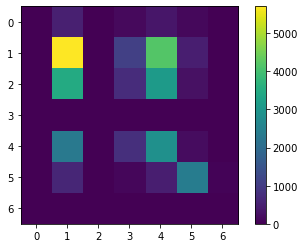

In [21]:
plt.imshow(relations_Beifall)
plt.colorbar()
plt.show()

In [22]:
speeches_of_party = filter_party(list_party[4],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],list_party[1]] , keywords[1:5] , speeches_of_party)
print(f'Redner von {list_party[4]} erhielt {keywords[0]} von der {list_party[1]}: {len(speeches_of_party_with_keywords)}')

speeches_of_party = filter_party(list_party[1],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],list_party[4]] , keywords[1:5] , speeches_of_party)
print(f'Redner von {list_party[1]} erhielt {keywords[0]} von der {list_party[4]}: {len(speeches_of_party_with_keywords)}')

speeches_of_party = filter_party(list_party[0],speeches_comments)
speeches_of_party_with_keywords = filter_speeches_of_party([keywords[0],list_party[0]] , keywords[1:5] , speeches_of_party)
print(f'Redner von {list_party[0]} erhielt {keywords[0]} von der {list_party[0]}: {len(speeches_of_party_with_keywords)}')

Redner von FDP erhielt Beifall von der SPD: 2307
Redner von SPD erhielt Beifall von der FDP: 4180
Redner von DIE LINKE. erhielt Beifall von der DIE LINKE.: 0


TypeError: Invalid shape (2,) for image data

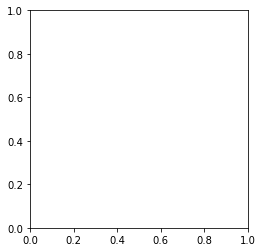

In [23]:
fig, ax = plt.subplots()

intersection_matrix = relations_Beifall[px,py],size=(len(list_party), len(list_party))


#np.random.randint(0, 10, size=(len(list_party), len(list_party)))

ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

for px in range(7):
    for py in range(7):
        c = intersection_matrix[px,py]
        ax.text(px, py, str(c), va='center', ha='center')